In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from codes import*
from train import*
from torchvision import models

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as Fn

In [4]:
cuda = torch.cuda.is_available()
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

In [5]:
df = pd.read_csv('training.csv')

In [6]:
df = df[['image_name','x1','y1','x2','y2']]

In [7]:
df.head()

,image_name,x1,y1,x2,y2
0,JPEG_20160706_121146_1000145715002.png,115,143,495,325
1,JPEG_20161119_174038_1000690577600.png,23,61,457,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,13,601,470
3,147772332675720161028_161611.png,27,162,602,385
4,1473315333651DeeplearnS11638.png,60,174,586,325


In [8]:
import os

In [9]:
len(os.listdir('images/images/images'))

56791

In [10]:
train_df = df[:12000]
val_df = df[12000:]

In [11]:
arch = models.resnet34()
bs = 8
path = 'images/images/images'

In [12]:
train_dataset = MyDataset(train_df,path)
val_dataset = MyDataset(val_df,path)
train_data = DataLoader(train_dataset,batch_size=bs,shuffle=True)
val_data = DataLoader(train_dataset,batch_size=bs,shuffle=True)

In [13]:
model = cnn_network(arch,pretrained=False,fci=51200)
# model = TripletNet(models.resnet18(),pretrained=False,fci = 32768)
if cuda:
    model.cuda()

In [13]:
# x= torch.randn(3,3,256,256)

In [16]:
# model

cnn_network(
  (convnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [19]:
# loss_fn = Fn.l1_loss
# lr = 1e-3
# optimizer = optim.Adam(model.parameters(),lr = lr)
# scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max = int(train_df.shape[0]/bs))
# n_epoch = 5
# log_interval = 20

In [15]:
def fit_on_epoch(lr,epoch,li):
    loss_fn = Fn.l1_loss
#     lr = 1e-3
    optimizer = optim.Adam(model.parameters(),lr = lr)
    scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max = int(train_df.shape[0]/bs))
#     n_epoch = 5
    log_interval = li
    fit(train_data,model,loss_fn,optimizer,scheduler,epoch,cuda,log_interval,val_loader=val_data)

In [22]:
fit_on_epoch(1e-3,1,100)

Train: [0/12000 (0%)]	Loss: 156.407867
Train: [800/12000 (7%)]	Loss: 28.422564
Train: [1600/12000 (13%)]	Loss: 22.870360
Train: [2400/12000 (20%)]	Loss: 20.532123
Train: [3200/12000 (27%)]	Loss: 19.301169
Train: [4000/12000 (33%)]	Loss: 16.850657
Train: [4800/12000 (40%)]	Loss: 17.016669
Train: [5600/12000 (47%)]	Loss: 16.914605
Train: [6400/12000 (53%)]	Loss: 16.619249
Train: [7200/12000 (60%)]	Loss: 16.524399
Train: [8000/12000 (67%)]	Loss: 15.938081
Train: [8800/12000 (73%)]	Loss: 15.355842
Train: [9600/12000 (80%)]	Loss: 15.188451
Train: [10400/12000 (87%)]	Loss: 14.756109
Train: [11200/12000 (93%)]	Loss: 13.194001
Epoch: 1/1. Train set: Average loss: 17.6172
Epoch: 1/1. Validation set: Average loss: 37.1434


In [16]:
fit_on_epoch(1e-3,1,100)

Train: [0/12000 (0%)]	Loss: 11.788807
Train: [800/12000 (7%)]	Loss: 15.632425
Train: [1600/12000 (13%)]	Loss: 14.428288
Train: [2400/12000 (20%)]	Loss: 13.044739
Train: [3200/12000 (27%)]	Loss: 13.218857
Train: [4000/12000 (33%)]	Loss: 12.976039
Train: [4800/12000 (40%)]	Loss: 12.122606
Train: [5600/12000 (47%)]	Loss: 12.255518
Train: [6400/12000 (53%)]	Loss: 11.497699
Train: [7200/12000 (60%)]	Loss: 11.243632
Train: [8000/12000 (67%)]	Loss: 11.160668
Train: [8800/12000 (73%)]	Loss: 11.889190
Train: [9600/12000 (80%)]	Loss: 11.121281
Train: [10400/12000 (87%)]	Loss: 11.535950
Train: [11200/12000 (93%)]	Loss: 11.228793
Epoch: 1/1. Train set: Average loss: 12.2701
Epoch: 1/1. Validation set: Average loss: 10.5864


In [23]:
torch.save(model.state_dict(),'res34')

In [14]:
model.load_state_dict(torch.load('res34'))
if cuda:
    model.cuda()

In [18]:
x,y = next(iter(train_data))

In [19]:
im = F.to_pil_image(x[1])
# plt.imshow(x[0])

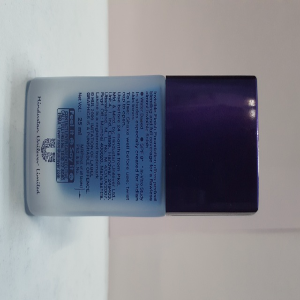

In [23]:
im

In [22]:
# im.getbbox??

In [35]:
y[1]

tensor([ 98.4375, 110.0000, 236.2500, 190.6250])

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
#     ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(y[i])
    ax = show_img(x, ax=ax)
    draw_rec(ax, b)
plt.tight_layout()

In [37]:
np.reshape(x,(8,300,300,3)).shape

(8, 300, 300, 3)